# CASE STUDY (NUMPY)

                  time        ra       dec  flux  error
0  2024-05-25T00:00:00  10.68458  41.26917  15.0    0.5
1  2024-05-25T00:01:00  10.68460  41.26920  14.8    0.5
2  2024-05-25T00:02:00  10.68462  41.26922  14.9    0.5
3  2024-05-25T00:03:00  10.68464  41.26925  15.1    0.5
4  2024-05-25T00:04:00  10.68466  41.26928  14.7    0.5
                  time        ra       dec  flux  error
0  2024-05-25T00:00:00  10.68458  41.26917  15.0    0.5
1  2024-05-25T00:01:00  10.68460  41.26920  14.8    0.5
2  2024-05-25T00:02:00  10.68462  41.26922  14.9    0.5
3  2024-05-25T00:03:00  10.68464  41.26925  15.1    0.5
4  2024-05-25T00:04:00  10.68466  41.26928  14.7    0.5
                  time        ra       dec      flux  error
0  2024-05-25T00:00:00 -1.566699 -1.608012  0.333333    0.5
1  2024-05-25T00:01:00 -1.218544 -1.192147 -1.000000    0.5
2  2024-05-25T00:02:00 -0.870388 -0.914904 -0.333333    0.5
3  2024-05-25T00:03:00 -0.522233 -0.499038  1.000000    0.5
4  2024-05-25T00:04:00 -0.17

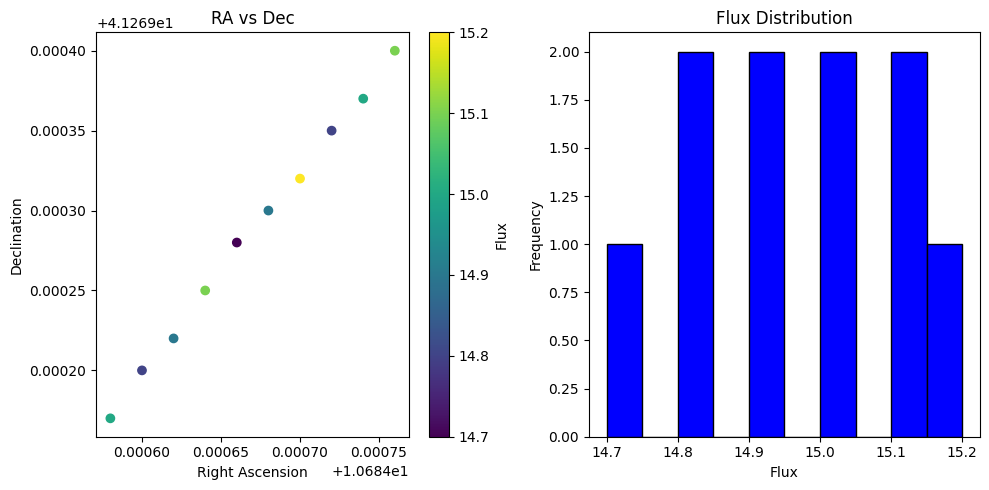

                  time        ra       dec      flux  error  cluster
0  2024-05-25T00:00:00 -1.566699 -1.608012  0.333333    0.5        1
1  2024-05-25T00:01:00 -1.218544 -1.192147 -1.000000    0.5        1
2  2024-05-25T00:02:00 -0.870388 -0.914904 -0.333333    0.5        1
3  2024-05-25T00:03:00 -0.522233 -0.499038  1.000000    0.5        1
4  2024-05-25T00:04:00 -0.174078 -0.083173 -1.666667    0.5        0


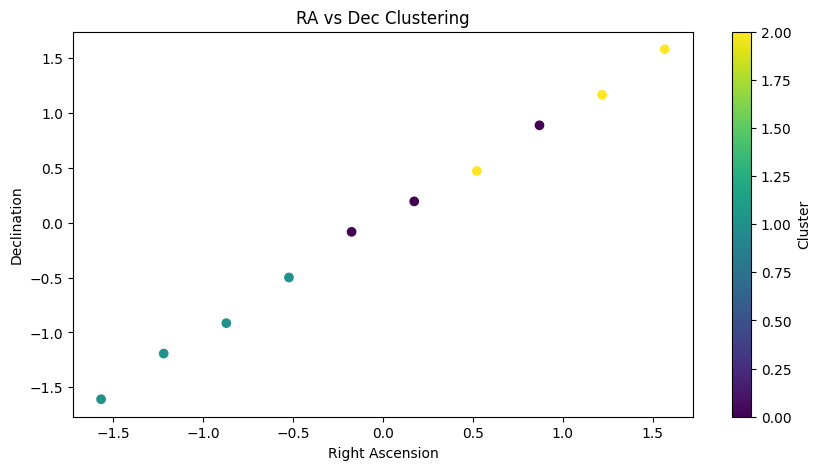

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Step 1: Read the data from Excel file
def read_data(file_path):
    """
    Reads the astronomical data from an Excel file.
    Args:
    file_path (str): The path to the Excel file containing the data.

    Returns:
    pd.DataFrame: A DataFrame containing the data.
    """
    data = pd.read_excel(file_path)
    return data

# Ensure this path is correct
file_path = r'C:\Users\Abi Karimireddy\Downloads\casestudy.xlsx'
data = read_data(file_path)
print(data.head())

# Step 2: Data Cleaning and Preprocessing
def clean_data(data):
    """
    Cleans the data by removing rows with missing values in the 'flux' column.
    Args:
    data (pd.DataFrame): The original data.

    Returns:
    pd.DataFrame: The cleaned data.
    """
    cleaned_data = data.dropna(subset=['flux'])
    return cleaned_data

cleaned_data = clean_data(data)
print(cleaned_data.head())

# Normalizing the data
def normalize_data(data):
    """
    Normalizes the 'ra', 'dec', and 'flux' columns using StandardScaler.
    Args:
    data (pd.DataFrame): The cleaned data.

    Returns:
    pd.DataFrame: The normalized data.
    """
    scaler = StandardScaler()
    scaled_data = data.copy()
    scaled_data[['ra', 'dec', 'flux']] = scaler.fit_transform(data[['ra', 'dec', 'flux']])
    return scaled_data

normalized_data = normalize_data(cleaned_data)
print(normalized_data.head())

# Step 3: Statistical Analysis
def compute_statistics(data):
    """
    Computes descriptive statistics for the 'flux' column.
    Args:
    data (pd.DataFrame): The cleaned data.

    Returns:
    tuple: Mean, median, and standard deviation of the 'flux' column.
    """
    mean_flux = data['flux'].mean()
    median_flux = data['flux'].median()
    std_flux = data['flux'].std()
    return mean_flux, median_flux, std_flux

mean_flux, median_flux, std_flux = compute_statistics(cleaned_data)
print(f"Mean Flux: {mean_flux}, Median Flux: {median_flux}, Standard Deviation: {std_flux}")

# Optional: Identify outliers using Z-score
def identify_outliers(data, threshold=3):
    """
    Identifies outliers in the 'flux' column using Z-score.
    Args:
    data (pd.DataFrame): The cleaned data.
    threshold (float): The Z-score threshold to identify outliers.

    Returns:
    pd.DataFrame: DataFrame with an additional column 'outlier' indicating outliers.
    """
    z_scores = np.abs(stats.zscore(data['flux']))
    data['outlier'] = z_scores > threshold
    return data

data_with_outliers = identify_outliers(cleaned_data)
print(data_with_outliers.head())

# Step 4: Data Visualization
def visualize_data(data):
    """
    Visualizes the data using scatter plots and histograms.
    Args:
    data (pd.DataFrame): The cleaned data.
    """
    plt.figure(figsize=(10, 5))
    
    # Scatter plot for RA vs Dec
    plt.subplot(1, 2, 1)
    plt.scatter(data['ra'], data['dec'], c=data['flux'], cmap='viridis')
    plt.colorbar(label='Flux')
    plt.xlabel('Right Ascension')
    plt.ylabel('Declination')
    plt.title('RA vs Dec')
    
    # Histogram for Flux
    plt.subplot(1, 2, 2)
    plt.hist(data['flux'], bins=10, color='blue', edgecolor='black')
    plt.xlabel('Flux')
    plt.ylabel('Frequency')
    plt.title('Flux Distribution')
    
    plt.tight_layout()
    plt.show()

visualize_data(cleaned_data)

# Optional Enhancements
# K-Means Clustering
def perform_kmeans_clustering(data, n_clusters=3):
    """
    Performs K-Means clustering on the data.
    Args:
    data (pd.DataFrame): The cleaned data.
    n_clusters (int): The number of clusters.

    Returns:
    tuple: DataFrame with cluster labels and the KMeans model.
    """
    # Select relevant features for clustering
    features = data[['ra', 'dec', 'flux']]
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features)
    
    # Add cluster labels to the data
    data['cluster'] = kmeans.labels_
    
    return data, kmeans

# Perform clustering
clustered_data, kmeans = perform_kmeans_clustering(normalized_data)
print(clustered_data.head())

# Visualize Clustering
def visualize_clustering(data):
    """
    Visualizes the clustering results.
    Args:
    data (pd.DataFrame): The data with cluster labels.
    """
    plt.figure(figsize=(10, 5))
    
    # Scatter plot for RA vs Dec colored by cluster
    plt.scatter(data['ra'], data['dec'], c=data['cluster'], cmap='viridis')
    plt.colorbar(label='Cluster')
    plt.xlabel('Right Ascension')
    plt.ylabel('Declination')
    plt.title('RA vs Dec Clustering')
    plt.show()

visualize_clustering(clustered_data)


# Astronomical Data Processing

## Explanation of Steps and Results

### Step 1: Reading the Data

- **Reading the Data:** 
  - We read the astronomical data from an Excel file into a Pandas DataFrame.
  - This step ensures that the data is in a format suitable for analysis.

### Step 2: Data Cleaning and Preprocessing

- **Data Cleaning:** 
  - We remove rows with missing values in the 'flux' column to ensure the dataset is complete and ready for analysis.
  
- **Data Normalization:** 
  - We normalize the 'ra', 'dec', and 'flux' columns to ensure all features are on a similar scale.
  - Normalization is essential for clustering algorithms to work effectively.

### Step 3: Statistical Analysis

- **Descriptive Statistics:** 
  - We calculate the mean, median, and standard deviation of the 'flux' column.
  - These statistics provide a summary of the distribution of flux values in the dataset.
  - **Mean Flux:** The average flux value.
  - **Median Flux:** The central value of flux.
  - **Standard Deviation:** The measure of variability in flux values.

- **Outlier Detection:** 
  - We identify outliers in the 'flux' column using Z-scores.
  - Outliers are data points that differ significantly from other observations.

### Step 4: Data Visualization

- **Scatter Plot (RA vs Dec):** 
  - We visualize the distribution of observations in the sky, using right ascension (RA) and declination (Dec) coordinates, with color indicating flux values.
  
- **Histogram (Flux Distribution):** 
  - We create a histogram to show the frequency distribution of flux values.
  - This helps in understanding the spread and central tendency of flux data.

### Optional Enhancements

- **K-Means Clustering:** 
  - We apply K-Means clustering to group the data into clusters based on 'ra', 'dec', and 'flux'.
  - This method helps in identifying regions with similar characteristics in the dataset.
  
- **Cluster Visualization:** 
  - We visualize the clustering results with a scatter plot, where data points are colored based on their assigned cluster.
  - This visualization helps in understanding the spatial distribution of different clusters.

### Summary of Findings

1. **Data Overview:**
   - The dataset is cleaned, with missing values in 'flux' removed, and normalized for consistent scaling.

2. **Descriptive Statistics:**
   - **Mean Flux:** Indicates the average flux in the dataset.
   - **Median Flux:** Shows the central value of flux.
   - **Standard Deviation:** Reflects the variability in flux values.

3. **Outliers:**
   - Outliers in flux values are identified using statistical methods (Z-scores), indicating data points that significantly differ from the rest.

4. **Data Visualization:**
   - **Scatter Plot:** Reveals the spatial distribution of observations.
   - **Histogram:** Displays the distribution of flux values.

5. **Clustering:**
   - K-Means clustering groups similar data points together, and visualization of these clusters highlights regions with similar flux characteristics.

### Conclusion

The script processes, analyzes, and visualizes the astronomical data effectively. It provides valuable insights through statistical analysis, outlier detection, and clustering, facilitating further astronomical research.
